In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Read the results file and the schema file into a dataframe

In [2]:
df = pd.read_csv("developer_survey_2020/survey_results_public.csv")
df_schema = pd.read_csv("developer_survey_2020/survey_results_schema.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Show the result schema

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    display(df_schema)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


## Provide a set of columns with 0 missing values.

In [5]:
no_nulls = set(df.columns[df.isnull().mean()==0])
no_nulls

{'Respondent'}

## Provide a set of columns with more than 30% of the values missing

In [6]:
most_missing_cols = set(df.columns[df.isnull().mean() > 0.3])
most_missing_cols

{'CompFreq',
 'CompTotal',
 'ConvertedComp',
 'DatabaseDesireNextYear',
 'MiscTechDesireNextYear',
 'MiscTechWorkedWith',
 'NEWDevOps',
 'NEWDevOpsImpt',
 'NEWJobHunt',
 'NEWJobHuntResearch',
 'NEWOnboardGood',
 'NEWOvertime',
 'NEWPurchaseResearch',
 'OrgSize',
 'PurchaseWhat',
 'Sexuality',
 'WebframeDesireNextYear',
 'WebframeWorkedWith',
 'WorkWeekHrs'}

## The below shows a bar chart of distribution of the Main Branch

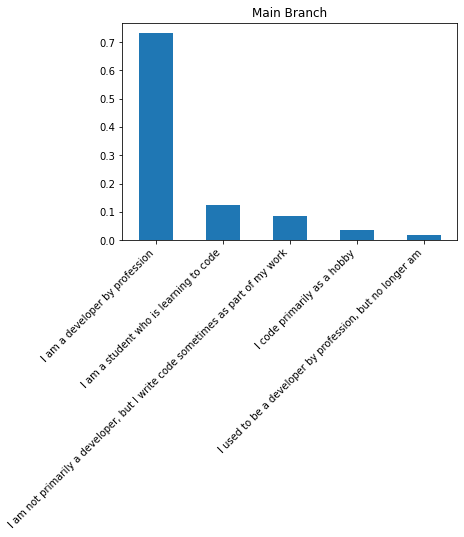

In [7]:
count_vals = df.MainBranch.value_counts()

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Main Branch");

## The below shows a bar chart of distribution of the Employment

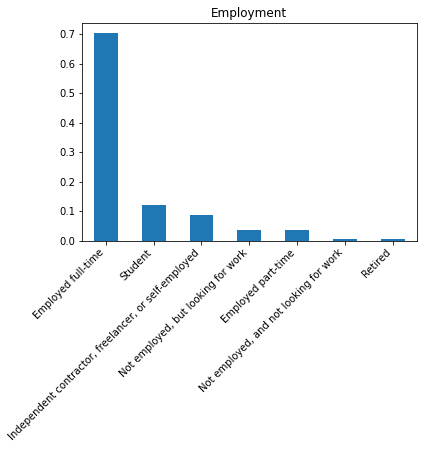

In [46]:
count_vals = df.Employment.value_counts()

# The below should be a bar chart of the proportion of the top 10 countries for the
# individuals in your count_vals if it is set up correctly.

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Employment");

## Unique values of Job Satisfaction

In [9]:
df.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

### Map Job Satisfaction to a score

In [10]:
def mapToScore(x):
    switcher = {
        "Very dissatisfied": 0,
        "Slightly dissatisfied": 1,
        "Neither satisfied nor dissatisfied": 2,
        "Slightly satisfied": 3,
        "Very satisfied": 4,
    }
    if x is not None:
        return switcher.get(x)
    return None
    
df['JobSatScore'] = df.JobSat.apply(lambda x : mapToScore(x))

## Unique values of Overtime

In [11]:
df.NEWOvertime.unique()

array(['Often: 1-2 days per week or more', nan,
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Sometimes: 1-2 days per month but less than weekly',
       'Rarely: 1-2 days per year or less'], dtype=object)

### Map Overtime to a score

In [12]:
def mapToBucket(x):
    switcher = {
        "Often: 1-2 days per week or more": 4,
        "Sometimes: 1-2 days per month but less than weekly": 3,
        "Occasionally: 1-2 days per quarter but less than monthly": 2,
        "Rarely: 1-2 days per year or less": 1,
        "Never": 0,
    }
    if x is None:
        return None
    else:
        return switcher.get(x)
    
df['OvertimeScore'] = df.NEWOvertime.apply(lambda x: mapToBucket(x))

### Map Years Code to a bucket

In [13]:
def mapToBucket(x):
    if x=="Less than 1 year":
        return "Less than 1 year"
    elif x=="More than 50 years":
        return "More than 50 years"
    elif math.isnan(float(x)) or x is None:
        return None
    elif int(x)<=5 and int(x)>=1:
        return "1 to 5 years"
    elif int(x)<=10 and int(x)>=5:
        return "5 to 10 years"
    elif int(x)<=15 and int(x)>=10:
        return "10 to 15 years"
    elif int(x)<=20 and int(x)>=15:
        return "15 to 20 years"
    elif int(x)<=25 and int(x)>=20:
        return "20 to 25 years"
    elif int(x)<=30 and int(x)>=25:
        return "25 to 30 years"
    elif int(x)<=40 and int(x)>=30:
        return "30 to 40 years"
    elif int(x)<=50 and int(x)>=40:
        return "40 to 50 years"
    
df['YearsCodeBucket'] = df.YearsCodePro.apply(lambda x: mapToBucket(x))

## We will only be looking at developers by profession and ones that are working full time

In [14]:
df_devs = df[(df.MainBranch == "I am a developer by profession") & (df.Employment=='Employed full-time')]

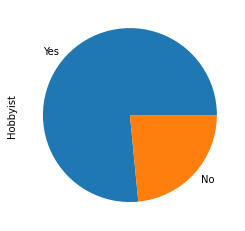

In [48]:
count_vals = df_devs.Hobbyist.value_counts()
(count_vals[:10]/df_devs.shape[0]).plot(kind="pie");

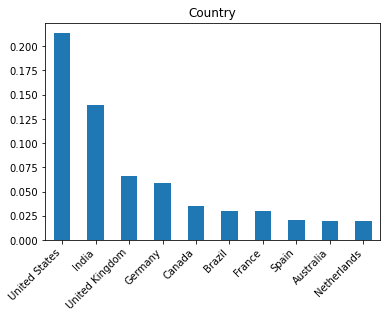

In [16]:
count_vals = df_devs.Country.value_counts()
(count_vals[:10]/df_devs.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Country");

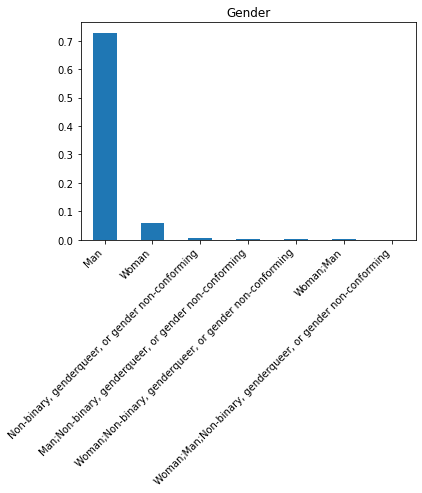

In [50]:
count_vals = df_devs.Gender.value_counts()
(count_vals/df_devs.shape[0]).plot(kind="bar");
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Gender");

## How does the age distribution look between Male and Female respondents?

<AxesSubplot:ylabel='Frequency'>

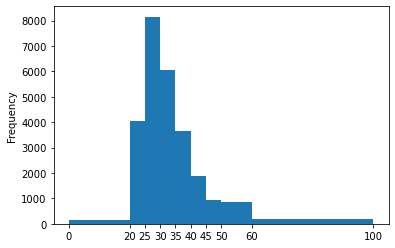

In [42]:
df_devs[df_devs['Gender'] == 'Man'].Age.plot(kind="hist", bins=[0,20,25,30,35,40,45,50,60,100],xticks=[0,20,25,30,35,40,45,50,60,100])

<AxesSubplot:ylabel='Frequency'>

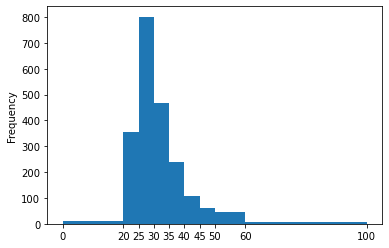

In [41]:
df_devs[df_devs['Gender'] == 'Woman'].Age.plot(kind="hist", bins=[0,20,25,30,35,40,45,50,60,100],xticks=[0,20,25,30,35,40,45,50,60,100])

In [20]:
df_devs[['JF1','JF2','JF3']] = df_devs.JobFactors.str.split(";", n=2, expand = True)

/Users/olx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
df_devs_male = df_devs[df_devs['Gender']=="Man"]
df_devs_female = df_devs[df_devs['Gender']=="Woman"]
df_devs_nb = df_devs[~df_devs['Gender'].isin(["Woman","Man"])]

## What Job Factors vary between Males and Females when it comes to Job Satisfaction?

Text(0.5, 1.0, 'Male')

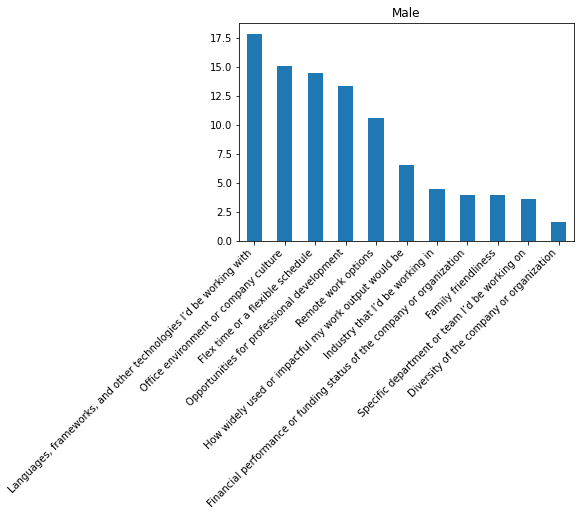

In [22]:
df_JF_male = df_devs_male[['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_male.JF.value_counts()

(count_vals*100/df_JF_male.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Male")

Text(0.5, 1.0, 'Female')

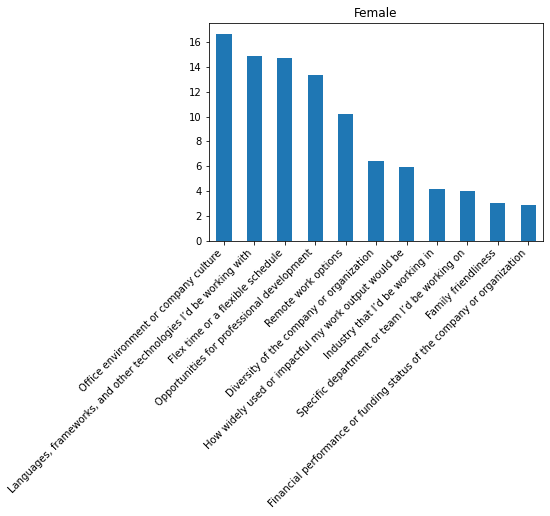

In [23]:
df_JF_female = df_devs_female[['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_female.JF.value_counts()
(count_vals*100/df_JF_female.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Female")

## What Job Factors vary between India and United States?

Text(0.5, 1.0, 'India')

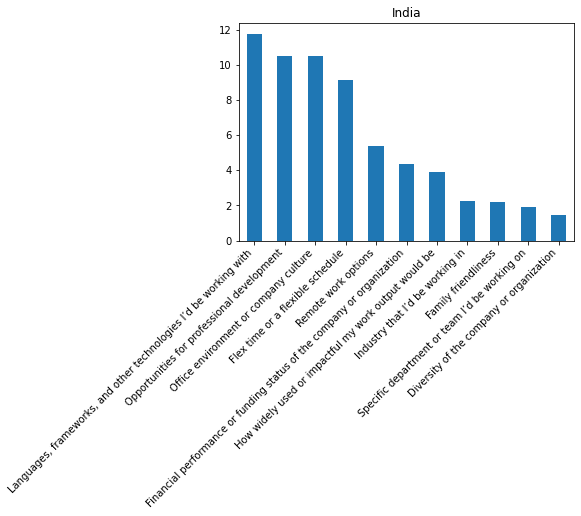

In [24]:
df_JF_india = df_devs[df_devs.Country=='India'][['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_india.JF.value_counts()
(count_vals*100/df_JF_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'United States')

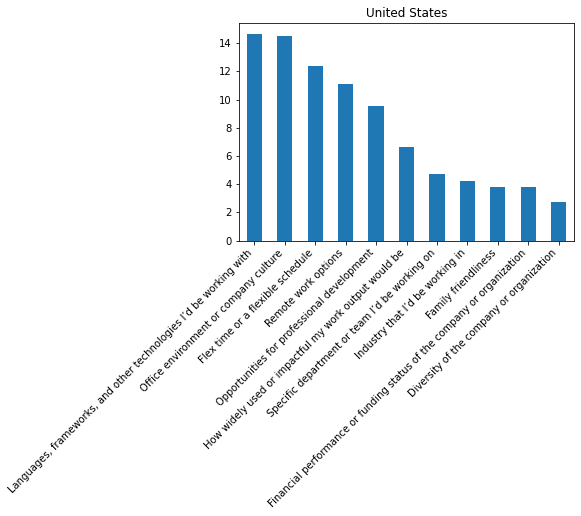

In [25]:
df_JF_us = df_devs[df_devs.Country=='United States'][['JF1','JF2','JF3']].melt(var_name='columns', value_name='JF')
count_vals = df_JF_us.JF.value_counts()
(count_vals*100/df_JF_us.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("United States")

## What is the distribution of Compensation by Country ?

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


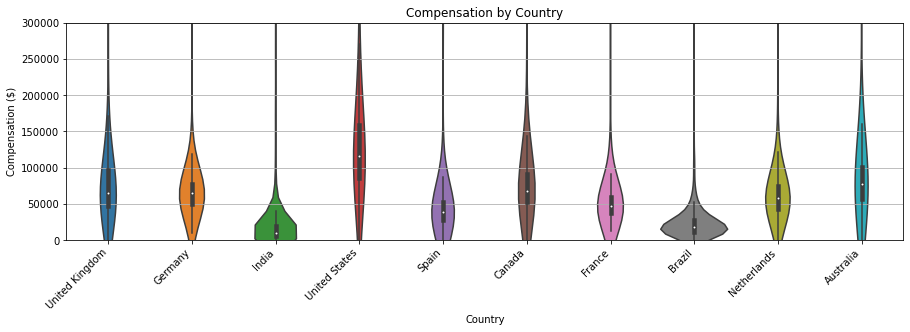

In [26]:
fig, axes = plt.subplots()
sns.violinplot('Country','ConvertedComp', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Compensation by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Compensation ($)')
fig.set_figwidth(15)
plt.ylim([0,300000])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

## What is the distribution of compensation by Years of Experience?

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


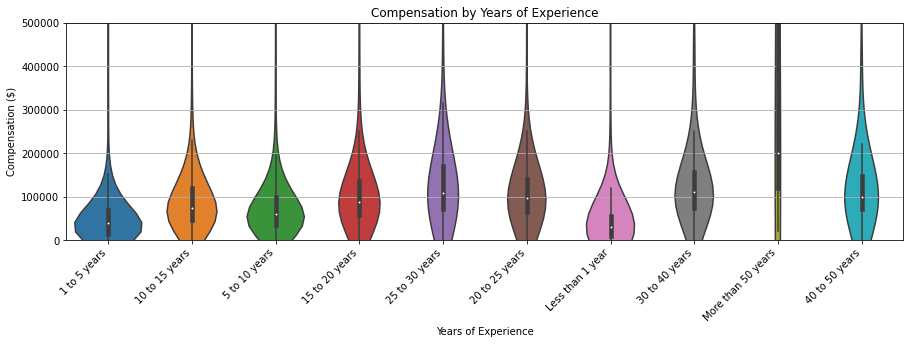

In [27]:
fig, axes = plt.subplots()
sns.violinplot('YearsCodeBucket','ConvertedComp', data=df_devs, ax = axes)
axes.set_title('Compensation by Years of Experience')

axes.yaxis.grid(True)
axes.set_xlabel('Years of Experience')
axes.set_ylabel('Compensation ($)')
fig.set_figwidth(15)
plt.ylim([0,500000])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

## How does the overtime culture vary by Country?

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/olx/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


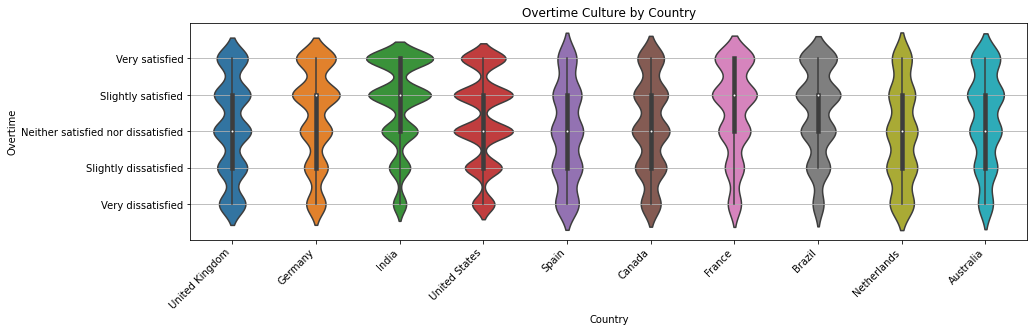

In [55]:
fig, axes = plt.subplots()
sns.violinplot('Country','OvertimeScore', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Overtime Culture by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Overtime')
axes.set_yticklabels(["Very dissatisfied","Slightly dissatisfied","Neither satisfied nor dissatisfied","Slightly satisfied","Very satisfied"])

fig.set_figwidth(15)
plt.yticks([0,1,2,3,4])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

/Users/olx/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


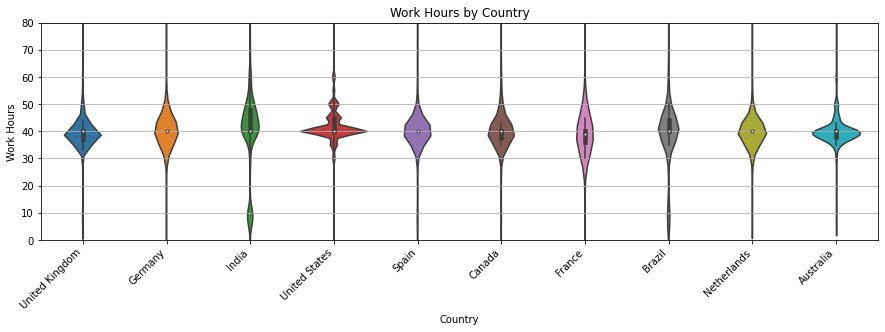

In [52]:
fig, axes = plt.subplots()
sns.violinplot('Country','WorkWeekHrs', data=df_devs[df_devs.Country.isin(df_devs.Country.value_counts()[:10].index)], ax = axes)
axes.set_title('Work Hours by Country')

axes.yaxis.grid(True)
axes.set_xlabel('Country')
axes.set_ylabel('Work Hours')

fig.set_figwidth(15)
plt.ylim([0,80])
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.show()

### Segregating Factors that influence a new Job Hunt

{'Curious about other opportunities', 'Growth or leadership opportunities', 'Wanting to share accomplishments with a wider network', 'Trouble with my direct manager', 'Better compensation', 'Having a bad day (or week or month) at work', 'Trouble with my teammates', 'Just because', 'Looking to relocate', 'Better work/life balance', 'Wanting to work with new technologies', 'Trouble with leadership at my company'}


<AxesSubplot:>

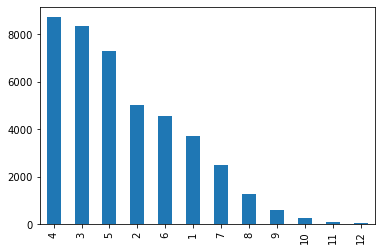

In [44]:
## Finding the distribution of the number of responses given by a single respondent
job_hunt = set()
job_factor_size = []
for index,row in df.iterrows():
    try:
        factors = row['NEWJobHunt'].split(';')
        job_factor_size.append(len(factors))
        for i in factors:
            job_hunt.add(i)
    except:
        None
print(job_hunt)
pd.Series(job_factor_size).value_counts().plot(kind="bar")

In [32]:
df_devs[['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']] = df_devs.NEWJobHunt.str.split(";", n=7, expand = True)

/Users/olx/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## What factors influence Male and Female respondents?

Text(0.5, 1.0, 'Male')

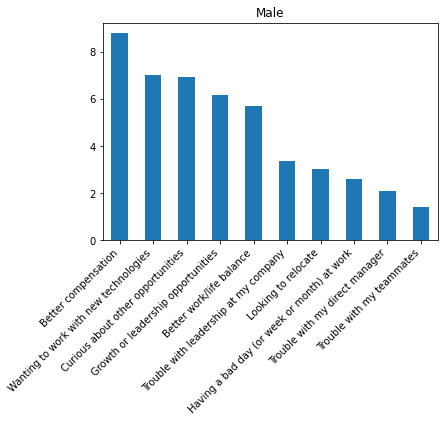

In [34]:
df_JH_male = df_devs[df_devs.Gender=='Man'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_male.JH.value_counts()

(count_vals[:10]*100/df_JH_male.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Male")

Text(0.5, 1.0, 'Female')

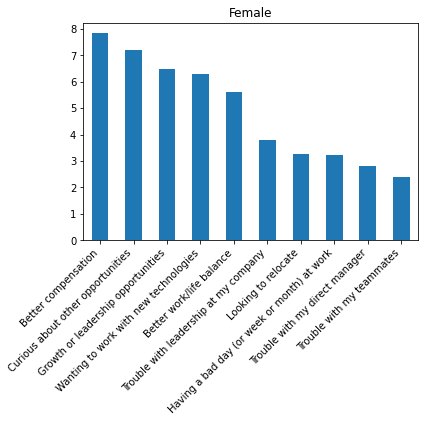

In [35]:
df_JH_female = df_devs[df_devs.Gender=='Woman'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_female.JH.value_counts()

(count_vals[:10]*100/df_JH_female.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("Female")

## What factors influence respondents from India and United States when looking for a new job?

Text(0.5, 1.0, 'India')

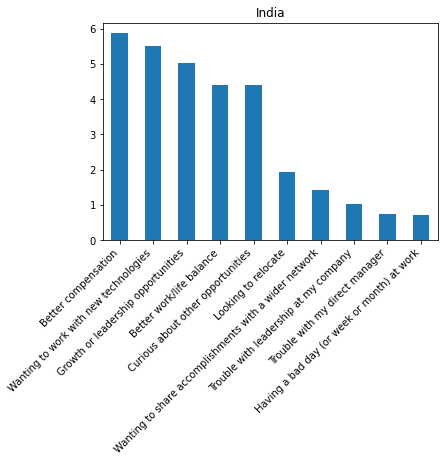

In [39]:
df_JH_india = df_devs[df_devs.Country=='India'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_india.JH.value_counts()

(count_vals[:10]*100/df_JH_india.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("India")

Text(0.5, 1.0, 'United States')

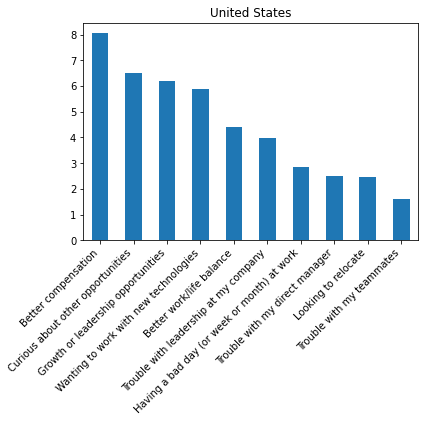

In [36]:
df_JH_US = df_devs[df_devs.Country=='United States'][['JH1','JH2','JH3','JH4','JH5','JH6','JH7','JH8']].melt(var_name='columns', value_name='JH')
count_vals = df_JH_US.JH.value_counts()

(count_vals[:10]*100/df_JH_US.shape[0]).plot(kind="bar")
plt.xticks(rotation=45,
        horizontalalignment="right")
plt.title("United States")